In [1]:
# Алексеев Д.П. (DSU-4,FEML-8)
# Домашнее задание к лекции «Ансамблирование» (#10).

# Задание:
# Теперь решаем задачу регрессии - предскажем цены на недвижимость. 
# - Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data  (train.csv)
# - Построить случайный лес, вывести важность признаков
# - Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('E:\\Netology\\Machine Learning\\Practice\\house-prices-advanced-regression-techniques\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# определим массив признаков, отбросив целевую переменную
X = df.drop(columns='SalePrice')
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
# определим целевую переменную
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
#Разделяем на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(1022, 80)

In [8]:
#Находим категориальные признаки
categorials = list(df.dtypes[df.dtypes == object].index)

categorials_nunique = df[categorials].nunique()

#закодируем пропущенные значения категориальных признаков строкой NaN, 
# факт пропущенного значения тоже может нести в себе информацию
df[categorials] = df[categorials].fillna('NaN')

In [9]:
#отфильтруем непрерывные признаки
integer = [f for f in df if f not in (categorials + ['ID', 'SalePrice'])]

In [10]:
# Создаем дамми-переменные для категориальных признаков
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы модели могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)
X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)

In [11]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fence_MnPrv,HouseStyle_2Story,FireplaceQu_Ex,Fence_GdWo,Exterior2nd_Stucco,ExterQual_Ex,ExterCond_Ex,GarageQual_Po,Functional_Maj2,BsmtFinType2_Unf
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,732.338552,57.059687,-128.432485,10745.437378,6.128180,5.564579,1970.995108,1984.757339,102.019569,446.176125,...,0.109589,0.309198,0.017613,0.040117,0.019569,0.034247,0.001957,0.000978,0.003914,0.865949
std,425.860402,42.669715,416.863879,11329.753423,1.371391,1.110557,30.748816,20.747109,182.517743,459.971174,...,0.312530,0.462389,0.131603,0.196331,0.138583,0.181951,0.044216,0.031281,0.062469,0.340874
min,1.000000,20.000000,-999.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,367.500000,20.000000,40.000000,7564.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,735.500000,50.000000,62.500000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,390.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1100.500000,70.000000,79.000000,11692.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,724.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь построим модель регрессии методом случайного леса и определим важность признаков

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
# создаем и обучаем модель
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# оцениваем качество модели на тренировочных данных
clf_rf.score(X_train, y_train)

0.978008534356874

In [15]:
# оцениваем качество модели на тестовых данных
clf_rf.score(X_test, y_test)

0.8955091103768773

Модель получилась переобученной, т.к. на тренировочных данных коэфф-т детерминации получился гораздо выше, чем на тестовых.

In [16]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю
imp = pd.Series(clf_rf.feature_importances_)

In [17]:
imp.index = pd.Series(X_train.columns)

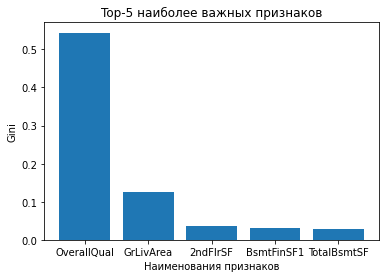

In [18]:
plt.title('Top-5 наиболее важных признаков')
plt.xlabel('Наименования признаков')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

Из диаграммы видно, что наибольшее значение имеет признак Overall Qual (Общее качество), 
остальные гораздо меньше влияют на стоимость недвижимости.

Теперь создадим и обучим стекинг как минимум 3х моделей (хотя бы 1 линейной и 1 нелинейной). 
За мета-алгоритм возьмем  RidgeCV-регрессию.

In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [20]:
# Создадим стекинг и обучим его на наших данных 
Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [21]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [22]:
# Оценим качество предсказаний (коэфф-т детерминации) на трейн и тест-выборках
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.9512831160183312
Score on test data 0.8651506014939354
Score on train data with model LinearRegression 0.9221085403562431
Score on test data with model LinearRegression 0.8533836050579423
Score on train data with model KNeighborsRegressor 0.7419951520813983
Score on test data with model KNeighborsRegressor 0.6775304068635524
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7620853367782132


Лучше всего отработала линейная регрессия (0.8533836050579423), затем дерево решений (0.7620853367782132), 
затем К-ближайших соседей (0.6775304068635524). 
Итоговое усредненное качество предсказаний на тестовой выборке = 0.8651506014939354. Дерево решений и KNN лишь незначительно помогли улучшить качество предсказаний по сравнению с линейной регрессией (с 0.853 лин.регр. до 0.865 итоговое).

Выведем результаты на графике.

In [23]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

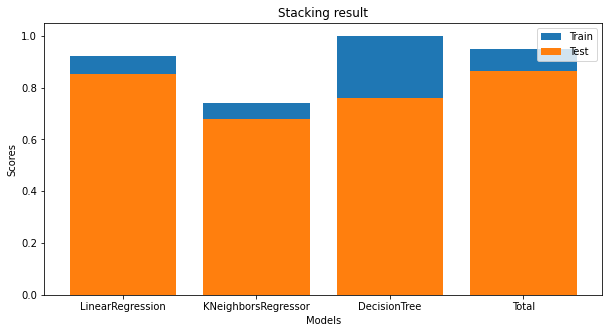

In [24]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()